<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Pytket installation and test </b></font>
<br>
_prepared by Abdullah Al Omar Galib, Soroush Sadeghiyeh_
<br><br>

- [Check your system](#check)
- [Install Pytket](#install)
- [Tips](#tips)
- [Execute an example quantum program](#test)
- [Complete test](#complete)

<hr id="check">

### Check your system

Check your system, if Pytket has already been installed:

In [1]:
import pytket
print("The version of Pytket is", pytket.__version__)

The version of Pytket is 1.18.0


**You should be able to see the version number of any library that is already installed in your system.**

<hr id="install">

### Install Pytket

(If you are an experienced user, visit this link: https://cqcl.github.io/tket/pytket/api/)

You can install Pytket by executing the following cell:

In [ ]:
! pip install pytket-quantinuum --user

__*Restart the kernel*__ (check "Kernel" menu) to apply the changes to the current notebook.

<hr id="tips">

### Tips

Any terminal/shell command can be executed in the notebook cells by putting an exclamation mark (!) at the beginning of the command.

$\rightarrow$ To update Pytket to the latest version, execute the following command in a code cell

    !pip install -U pytket --user
    
$\rightarrow$ To uninstall Pytket, execute the following command in a code cell

    !pip uninstall pytket

In [3]:
#! pip install -U pytket --user
#! pip uninstall pytket

<hr id="test">

### Execute an example quantum program


1) Create a quantum circuit

In [5]:
from pytket import Circuit

# create a quantum circuit with its register objects
circ = Circuit(2,2) # 2 qubits and 2 bits


# apply a Hadamard gate to the first qubit
circ.H(0)

# apply an X gate to the second qubit to set it to state |1>
circ.X(1)

# apply a CX gate with control qubit 0 and target qubit 1
circ.CX(0,1) # CX(First Qubit, Second Qubit)

# measure both qubits
circ.Measure(1,1) # measure Qubit 1 and write the output on bit 1
circ.Measure(0,0) # measure Qubit 0 and write the output on bit 0

print("The execution of the cell was completed, and the circuit was created :)")

The execution of the cell was completed, and the circuit was created :)


2) Draw the circuit

_Run the cell once more if the figure is not shown_

In [6]:
from pytket.circuit.display import render_circuit_jupyter
render_circuit_jupyter(circ)

### Render interactive circuit diagram
You can also render the circuit in Qiskit using pytket-qiskit

In [ ]:
# Install Pytket-Qiskit to run the next cell
! pip install pytket-qiskit --user

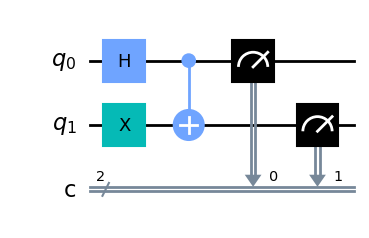

In [8]:
from pytket.extensions.qiskit import tk_to_qiskit

# Convert the Pytket circuit to Qiskit circuit
qc = tk_to_qiskit(circ) 

# Draw in Qiskit format
qc.draw(output='mpl') 

3) Execute the circuit 1024 times in the local simulator and print the observed the outcomes

In [9]:
from pytket.extensions.qiskit import AerBackend # Import a backend

backend = AerBackend() # Name it
compiled_circ = backend.get_compiled_circuit(circ) # Compile the circuit

handle = backend.process_circuit(compiled_circ, n_shots=1024) # Proccess and execute the circuit 1024 times

counts = backend.get_result(handle).get_counts() # Get the result

print(counts)

Counter({(1, 0): 546, (0, 1): 478})


<hr id="complete">

### Complete test

Here we put all methods and objects of Pytket used througout this tutorial (see [Pytket: Quick Reference](Q01_Pytket_Reference.ipynb) for a complete list).

By running the cell below, you should be able to test whether your Pytket installation is ready for our tutorial.

_It was tested with Pytket 1.18.0 on 23/08/2023._

In [10]:
from pytket.circuit import Circuit, Qubit
from pytket.extensions.qiskit import AerBackend
from pytket.circuit.display import render_circuit_jupyter
import math

# Create a circuit with 5 qubits and 5 classical bits
qc = Circuit(5, 5)

# Apply gates to the qubits
qc.X(2)
qc.Z(4)
qc.H(1)

a = math.pi / 7
qc.Ry(2 * a, 3)

qc.CX(1, 0)

# Create Qubit objects for the control and target qubits
q0 = Qubit(0)
q1 = Qubit(1)

qc.CU1(2 * a, q0, q1)

qc.CCX(2, 1, 0)


# Measure the qubits and write the output to the classical bits
qc.Measure(0, 3)
qc.Measure(1, 1)
qc.Measure(2, 4)
qc.Measure(3, 0)
qc.Measure(4, 2)



for i in range(5):
    if i % 2 == 0:
        qc.H(i)
    else:
        qc.X(i)

b = 3 * math.pi / 11

# Create Qubit objects for the control and target qubits
q0 = Qubit(0)
q1 = Qubit(1)

qc.CU1(2 * b, q0, q1)

# Run the circuit on a simulator backend
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(qc)

handle = backend.process_circuit(compiled_circ, n_shots=2000)
counts = backend.get_result(handle).get_counts()
print("measurement outcomes are:", counts)
print()

# draw circuit 
render_circuit_jupyter(qc)


# Create a new circuit with 2 qubits and 2 classical bits
qc = Circuit(2, 2)

qc.H(0)
qc.Ry(a, 0)
qc.X(1)
qc.CX(0, 1)

# Get the unitary matrix and print it
unitary = qc.get_unitary()
print("unitary matrix is")
print(unitary)
print()

# Get the quantum state and print it
statevector = qc.get_statevector()
print("quantum state is")
print(statevector)


# draw circuit 
render_circuit_jupyter(qc)


print()
print("All looks fine :-)")

measurement outcomes are: Counter({(1, 0, 0, 0, 1): 1005, (1, 1, 0, 0, 1): 939, (0, 0, 0, 0, 1): 29, (0, 1, 0, 0, 1): 27})



unitary matrix is
[[ 0.        +0.j  0.08033974+0.j  0.        +0.j  0.99676754+0.j]
 [ 0.08033974+0.j  0.        +0.j  0.99676754+0.j  0.        +0.j]
 [ 0.99676754+0.j  0.        +0.j -0.08033974+0.j  0.        +0.j]
 [ 0.        +0.j  0.99676754+0.j  0.        +0.j -0.08033974+0.j]]

quantum state is
[0.        +0.j 0.08033974+0.j 0.99676754+0.j 0.        +0.j]



All looks fine :-)
